<a href="https://colab.research.google.com/github/Imaspson/PyTorchLearning/blob/main/02_PyTorch_NN_Classification_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Putting it all together

* Binary classification = one thing or another (cat vs dog for example)
* Multi-class cassification = more than one thing or another (cat vs dog vs cow for example)

In [30]:
### Create a toy multiclass dataset

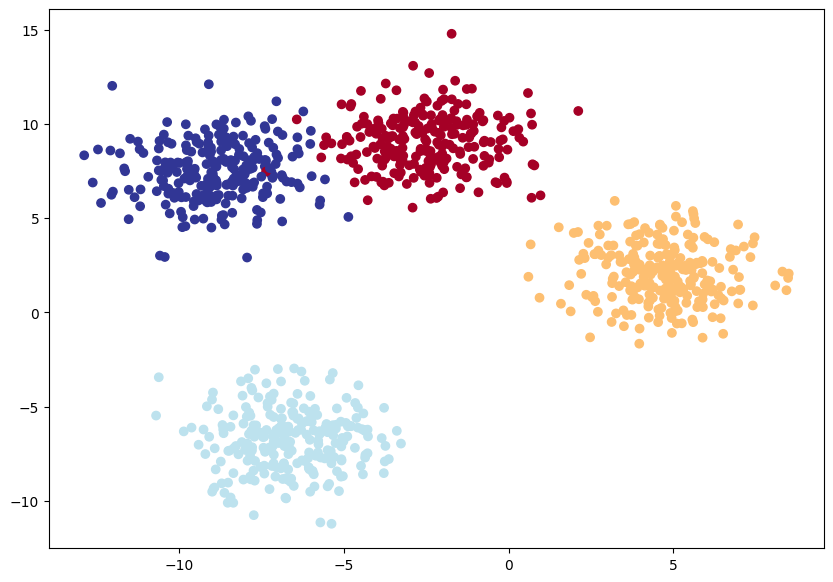

In [31]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hype parameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1.Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2.Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3.Split into training and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                  y_blob,
                                                                  test_size=0.2,
                                                                  random_state=RANDOM_SEED)

# 4.Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Building a multi-class classification model in PyTorch

In [32]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [33]:
# Build a multi class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multiclass classification model.

    Args:

    input_features (int) - Number of input features to the model
    output_features (int) - Number of outputs features
    hidden_units (int) - Number of hidden units between layers, default 0

    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
      return self.linear_layer_stack(x)

# Create an instance of Blob model and send it to the appropiate device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [34]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

### Create a loss function and an optimizer for a multi-class classification model

In [35]:
# Create a loss function for multi class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)



In [36]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

### Building a training loop

In [38]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss {loss} | Acc {acc} | Test loss {test_loss} | Test acc {test_acc}")


Epoch 0 | Loss 1.0636168718338013 | Acc 54.625 | Test loss 1.0038625001907349 | Test acc 55.00000000000001
Epoch 10 | Loss 0.6209551095962524 | Acc 97.25 | Test loss 0.636676013469696 | Test acc 98.0
Epoch 20 | Loss 0.406119167804718 | Acc 98.75 | Test loss 0.4103843569755554 | Test acc 100.0
Epoch 30 | Loss 0.23616164922714233 | Acc 99.125 | Test loss 0.22684261202812195 | Test acc 99.5
Epoch 40 | Loss 0.10442152619361877 | Acc 99.25 | Test loss 0.09486832469701767 | Test acc 99.5
Epoch 50 | Loss 0.06401817500591278 | Acc 99.25 | Test loss 0.056271616369485855 | Test acc 99.5
Epoch 60 | Loss 0.04967838153243065 | Acc 99.25 | Test loss 0.041912928223609924 | Test acc 99.5
Epoch 70 | Loss 0.042431510984897614 | Acc 99.25 | Test loss 0.03428656980395317 | Test acc 99.5
Epoch 80 | Loss 0.03798973932862282 | Acc 99.25 | Test loss 0.029491610825061798 | Test acc 99.5
Epoch 90 | Loss 0.03500832989811897 | Acc 99.25 | Test loss 0.02636662870645523 | Test acc 99.5


In [41]:
### Making and evaluating predictions with a PyTorch multi-class model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.6257,  6.0063, -7.6488, -8.4666],
        [-2.1813, -6.3889, -3.7303,  3.1376],
        [-3.4241, -3.9088,  3.1701, -2.6211],
        [-1.1539,  4.2110, -3.8565, -4.8926],
        [ 3.7713, -1.3379, -9.1623, -6.9665],
        [-2.8284, -7.5936, -4.3072,  3.8118],
        [-3.0427, -3.3442,  2.8070, -2.1454],
        [ 3.3902, -4.0445, -6.9149, -3.5610],
        [-4.3793, -5.0066,  3.8291, -3.3930],
        [ 3.5159, -3.0320, -7.5575, -4.7203]], device='cuda:0')

In [42]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3158e-03, 9.9868e-01, 1.1725e-06, 5.1754e-07],
        [4.8691e-03, 7.2458e-05, 1.0344e-03, 9.9402e-01],
        [1.3611e-03, 8.3833e-04, 9.9476e-01, 3.0383e-03],
        [4.6540e-03, 9.9492e-01, 3.1196e-04, 1.1070e-04],
        [9.9397e-01, 6.0044e-03, 2.4010e-06, 2.1578e-05],
        [1.3046e-03, 1.1117e-05, 2.9733e-04, 9.9839e-01],
        [2.8462e-03, 2.1055e-03, 9.8807e-01, 6.9819e-03],
        [9.9842e-01, 5.8947e-04, 3.3409e-05, 9.5600e-04],
        [2.7205e-04, 1.4528e-04, 9.9885e-01, 7.2945e-04],
        [9.9829e-01, 1.4306e-03, 1.5493e-05, 2.6444e-04]], device='cuda:0')

In [44]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [45]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

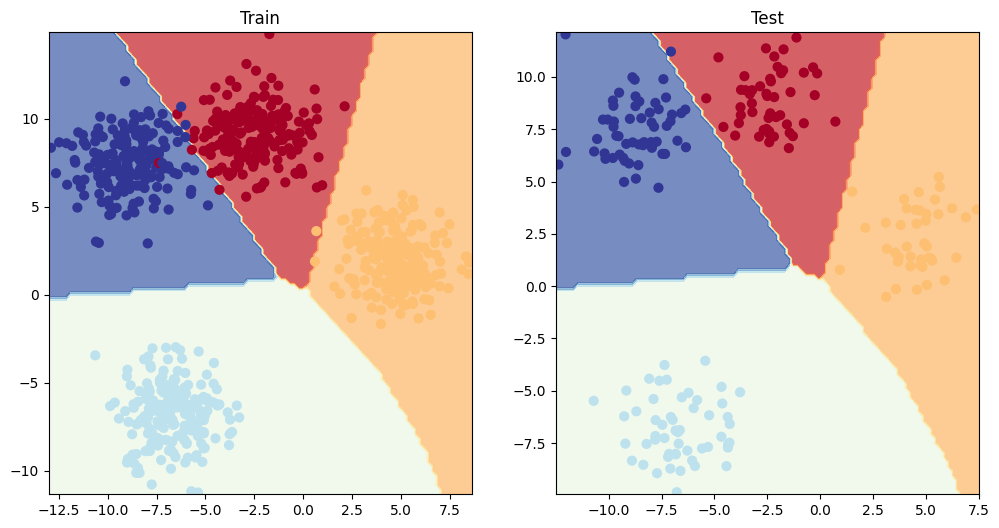

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)